In [60]:
from math import e
from numpy.core.numeric import cross
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import csvTools
from sklearn.model_selection import cross_val_score
import geopandas as gpd
from sklearn.utils import shuffle

In [61]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [57]:
crs_earth = 'EPSG:4326'
crs_maps = 'EPSG:3857'
crs = crs_maps

In [84]:
thePlantToFind = input('Indtast en plante her: ')

#plant_gdf_grid = csvTools.convert_csv_to_gdf('csv_files\\DK_Plant_10000.csv',True,crs=crs)
#plant_gdf_grid = plant_gdf_grid.drop(columns=['geometry'])
data = csvTools.convert_csv_to_gdf('csv_files/hallofinalcsv.csv',True,crs=crs)
data = data.drop(['geometry','Unnamed: 0'], axis = 1)
#dataNoPlants = data.drop(columns=plant_gdf_grid.columns)

x = np.array(data.drop(columns=[thePlantToFind]))
y = np.array(data[thePlantToFind])

print(x.shape)
print(y.shape)

x_shuffled = shuffle(x, random_state=42)
y_shuffled = shuffle(y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size = 0.30, random_state = 42)

k = 8
kf = KFold(n_splits=k, random_state=None)

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

rfc = RandomForestClassifier(n_estimators = 1000, random_state= 42)
rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)
probality = rfc.predict_proba(x_test)

Indtast en plante her:  Salix caprea


(1673, 2925)
(1673,)
x_train:  (1171, 2925)
y_train:  (1171,)
x_test:  (502, 2925)
y_test:  (502,)


In [82]:

trueplots = []
trueplotsvalues = []
for index, values in enumerate(predictions):
 if values == True:
    #print(index)
    trueplots.append(index)

compare = pd.read_csv('csv_files\\hallofinalcsv.csv')
compare = compare["geometry"]
print(compare)

for index,geometry in enumerate(compare):
    if index in trueplots:
        #print(geometry)
        trueplotsvalues.append(geometry)
dataplot = pd.DataFrame({'geometry':trueplotsvalues})
dataplot.to_csv('csv_files\\dataplottes.csv')
print(dataplot)
print("length pred", len(predictions))
print("length compare", len(compare))
print("length y_train", len(y_train))

print('accuracy score of training set: ', accuracy_score(y_train, rfc.predict(x_train)))
print('accuracy score of test set: ', accuracy_score(y_test, predictions))
print('confusion matrix: ')
print(confusion_matrix(y_test,predictions))
print_confusion_matrix(y_test,predictions)

0       POLYGON ((908433.4348778214 7466684.861747535,...
1       POLYGON ((908433.4348778214 7476684.861747535,...
2       POLYGON ((908433.4348778214 7486684.861747535,...
3       POLYGON ((908433.4348778214 7496684.861747535,...
4       POLYGON ((918433.4348778214 7456684.861747535,...
                              ...                        
1668    POLYGON ((1678433.434877821 7396684.861747535,...
1669    POLYGON ((1688433.434877821 7356684.861747535,...
1670    POLYGON ((1688433.434877821 7366684.861747535,...
1671    POLYGON ((1688433.434877821 7376684.861747535,...
1672    POLYGON ((1688433.434877821 7386684.861747535,...
Name: geometry, Length: 1673, dtype: object
                                              geometry
0    POLYGON ((908433.4348778214 7466684.861747535,...
1    POLYGON ((908433.4348778214 7476684.861747535,...
2    POLYGON ((908433.4348778214 7496684.861747535,...
3    POLYGON ((918433.4348778214 7466684.861747535,...
4    POLYGON ((918433.4348778214 7476684.86

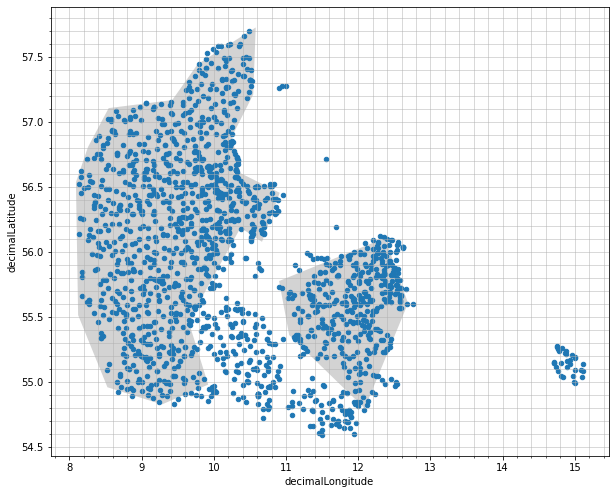

In [ ]:
plants = pd.read_csv('data/data_with_lat_long.csv', engine='python')
plantsdub = plants[(plants['species']!=thePlantToFind)].index
plants.drop(plantsdub, inplace=True)

#Make axis :O
fig, ax = plt.subplots(1, figsize=(10,10))

#plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Denmark"].plot(color="lightgrey", ax=ax)

plants.plot(x="decimalLongitude", y="decimalLatitude", kind="scatter", colormap='PiYG', ax=ax)

#add grid XD
ax.grid(which = "major", b=True, alpha=0.6)
plt.minorticks_on()
ax.grid(which = "minor", b=True, alpha=0.6)

plt.show()